# $\alpha−\alpha$ correlations as the fingerprints of the rescue mechanism

This notebook contains the experimental correlations between genes segments, the simulation accompanying the results, and the distribution of $V_\alpha$ and $J_\alpha$ genes.

In [1]:
# Experiment selection : 
exp="exp3"

In [3]:
from __future__ import division, print_function
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import optimize
import matplotlib.pyplot as plt
from matplotlib import ticker
from IPython.display import display, Math, Latex
from math import log, sqrt
import editdistance
import random


filepairsab = "../Datas/"+exp+"/pairs_ab.tsv.gz"
filepairsaa = "../Datas/"+exp+"/pairs_aa.tsv.gz"
filepairsbb = "../Datas/"+exp+"/pairs_bb.tsv.gz"


In [4]:
posgenesA = pd.read_csv("../Datas/genes/position_ordered_TCRA_Vgenes")
ordered_V_genes = list(posgenesA.name.values)
dfaa = pd.read_csv(filepairsaa, sep='\t')
df = dfaa[dfaa.distance > 20]
ordered_V_genes = [u for u in ordered_V_genes 
                   if u in df.vname_1.value_counts().keys() 
                   and df.vname_1.value_counts()[u] > 50 
                   and u[0:4] != "TCRD"]

posgenesA = pd.read_csv("../Datas/genes/position_ordered_TCRA_Jgenes")
ordered_J_genes = list(posgenesA.name.values)
ordered_J_genes = [u for u in ordered_J_genes 
                   if u in df.jname_1.value_counts().keys() 
                   and df.jname_1.value_counts()[u] > 50 
                   and u[0:4] != "TCRD"]


Covaav = {(v1, v2): np.mean((df['vname_1'] == v1) & (df['vname_2'] == v2)) 
     - np.mean((df['vname_1'] == v1))*np.mean((df['vname_2'] == v2))
     for v1 in ordered_V_genes for v2 in ordered_V_genes}
Sigma1 = {v1: np.std(df['vname_1'] == v1) for v1 in ordered_V_genes}
Sigma2 = {v2: np.std(df['vname_2'] == v2) for v2 in ordered_V_genes}

nCov = np.zeros((len(ordered_V_genes),len(ordered_V_genes)))
for k in range(len(ordered_V_genes)):
    for l in range(len(ordered_V_genes)):
        nCov[k,l] = (Covaav[(ordered_V_genes[k],ordered_V_genes[l])]
                       /(Sigma1[ordered_V_genes[k]]
                             *Sigma2[ordered_V_genes[l]])if k>=l else 0.)
indx = ordered_V_genes
uV = pd.DataFrame(nCov, index=indx, columns=indx)


Covaaj = {(j1, j2): np.mean((df['jname_1'] == j1) & (df['jname_2'] == j2)) 
     - np.mean((df['jname_1'] == j1))*np.mean((df['jname_2'] == j2))
     for j1 in ordered_J_genes for j2 in ordered_J_genes}
Sigma1 = {j1: np.std(df['jname_1'] == j1) for j1 in ordered_J_genes}
Sigma2 = {j2: np.std(df['jname_2'] == j2) for j2 in ordered_J_genes}
nCov = np.zeros((len(ordered_J_genes),len(ordered_J_genes)))
for k in range(len(ordered_J_genes)):
    for l in range(len(ordered_J_genes)):
        nCov[k,l] = (Covaaj[(ordered_J_genes[k],ordered_J_genes[l])]
                     /(Sigma1[ordered_J_genes[k]]
                           *Sigma2[ordered_J_genes[l]])if k>=l else 0.)
indx = ordered_J_genes
uJ = pd.DataFrame(nCov, index=indx, columns=indx)

Covaavj = {(v1, j2): np.mean((df['vname_1'] == v1) & (df['jname_2'] == j2)) 
     - np.mean((df['vname_1'] == v1))*np.mean((df['jname_2'] == j2))
     for v1 in ordered_V_genes for j2 in ordered_J_genes}
Sigma1 = {v1: np.std(df['vname_1'] == v1) for v1 in ordered_V_genes}
Sigma2 = {j2: np.std(df['jname_2'] == j2) for j2 in ordered_J_genes}
nCov = np.zeros((len(ordered_V_genes),len(ordered_J_genes)))
for k in range(len(ordered_V_genes)):
    for l in range(len(ordered_J_genes)):
        nCov[k,l] = (Covaavj[(ordered_V_genes[k],ordered_J_genes[l])]
                     /(Sigma1[ordered_V_genes[k]]
                           *Sigma2[ordered_J_genes[l]])) #if k>=l else 0.)
uVJ = pd.DataFrame(nCov, index=ordered_V_genes, columns=ordered_J_genes)

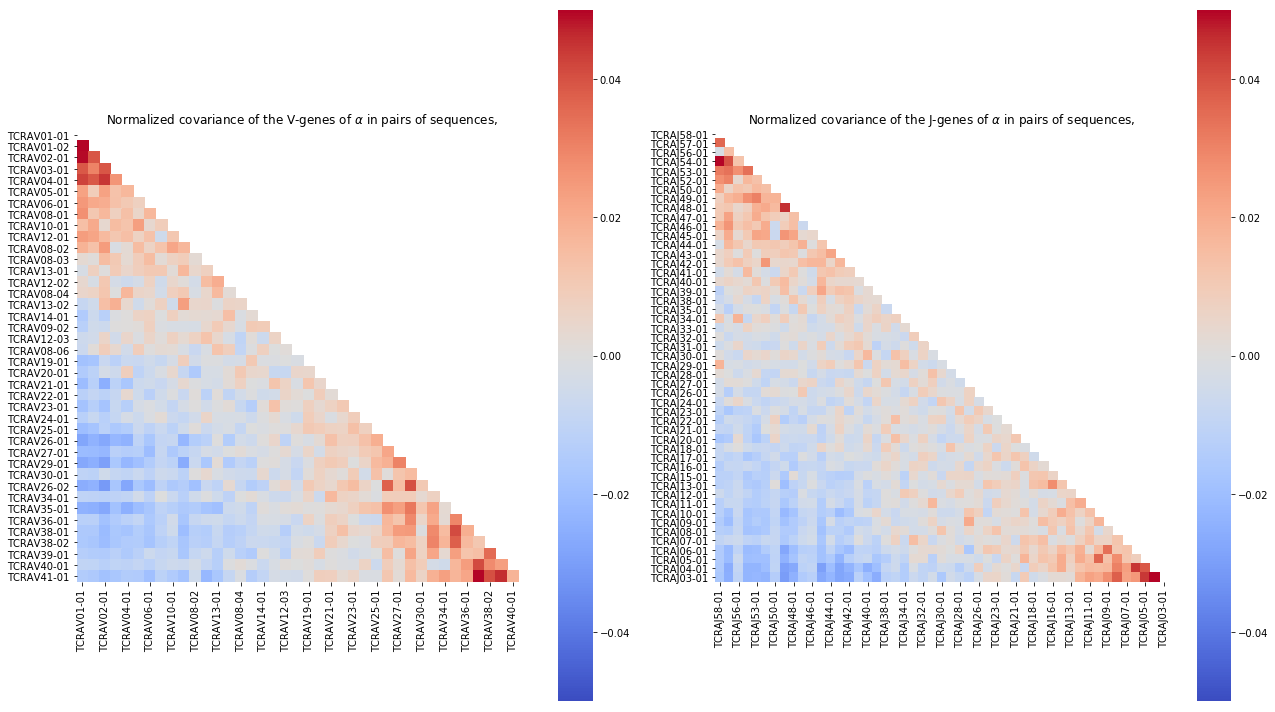

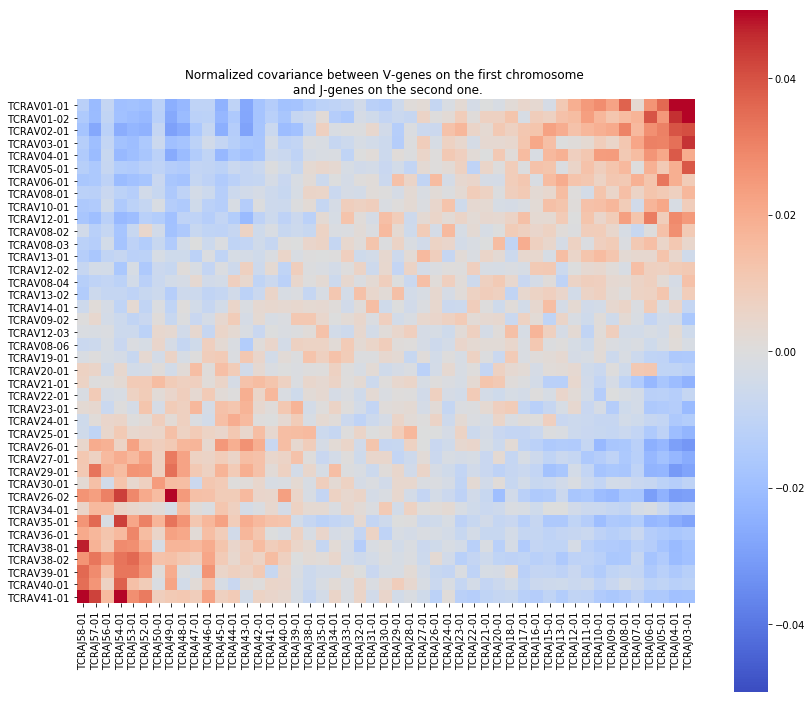

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,10))

mask=np.zeros_like(uV)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(uV, vmin=-0.05, vmax=0.05,mask=mask,cmap="coolwarm",square=True, ax=ax1)
ax1.set_title(r"Normalized covariance of the V-genes of $\alpha$ in pairs of sequences, ")
mask=np.zeros_like(uJ)
mask[np.triu_indices_from(mask)] = True
ax2 = sns.heatmap(uJ, vmin=-0.05, vmax=0.05,mask=mask,cmap="coolwarm", square=True, ax=ax2)
ax2.set_title(r"Normalized covariance of the J-genes of $\alpha$ in pairs of sequences, ")
# mask=np.zeros_like(uJ)
# mask[np.triu_indices_from(mask)] = True

fig2, (ax3) = plt.subplots(1,1,figsize=(12,10))
sns.heatmap(uVJ, vmin=-0.05, vmax=0.05,#mask=mask,
            cmap="coolwarm", square=True, ax=ax3)
ax3.set_title("Normalized covariance between V-genes on the first chromosome \n and J-genes on the second one.")


fig.tight_layout()
fig.savefig("covariance_alpha_alpha.pdf")
fig2.tight_layout()
fig2.savefig("covariance_alpha_alpha_vj.pdf")

plt.show()

## $\beta-\beta$ correlations 

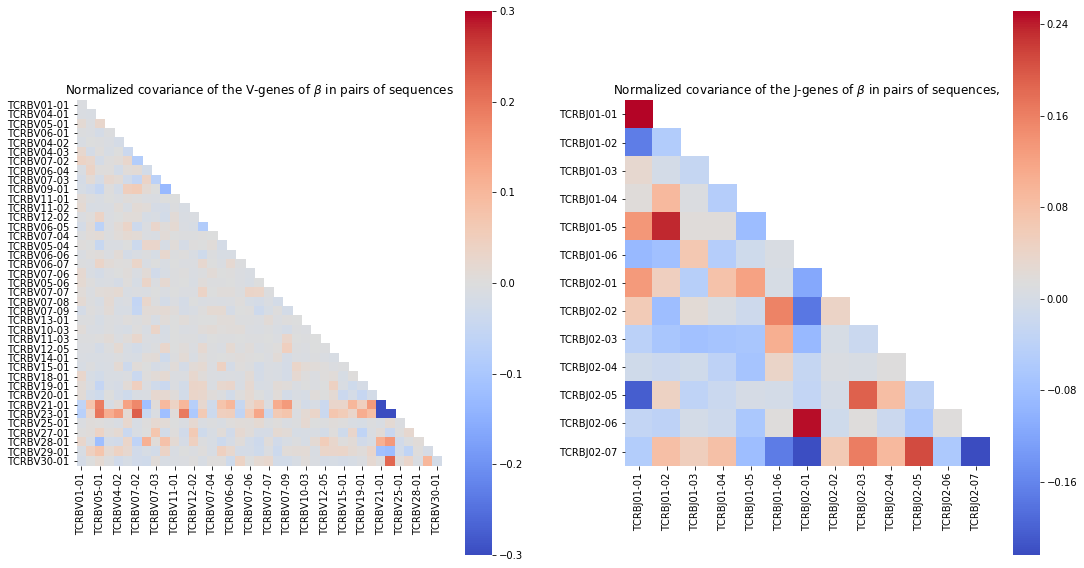

In [6]:
posgenesB = pd.read_csv("../Datas/genes/position_ordered_TCRB_Vgenes")
ordered_V_genes = list(posgenesB.name.values)
df = pd.read_csv(filepairsbb, sep='\t')
df = df[df.distance > 20]
ordered_V_genes = [u for u in ordered_V_genes 
                   if u in df.vname_1.value_counts().keys() and df.vname_1.value_counts()[u] > 20]

posgenesB = pd.read_csv("../Datas/genes/position_ordered_TCRB_Jgenes")
ordered_J_genes = list(posgenesB.name.values)
ordered_J_genes = [u for u in ordered_J_genes 
                   if u in df.jname_1.value_counts().keys() and df.jname_1.value_counts()[u] > 20]



Covbbv = {(v1, v2): np.mean((df['vname_1'] == v1) & (df['vname_2'] == v2)) 
     - np.mean((df['vname_1'] == v1))*np.mean((df['vname_2'] == v2))
     for v1 in ordered_V_genes for v2 in ordered_V_genes}
nCov = np.zeros((len(ordered_V_genes),len(ordered_V_genes)))
for k in range(len(ordered_V_genes)):
    for l in range(len(ordered_V_genes)):
        nCov[k,l] = (Covbbv[(ordered_V_genes[k],ordered_V_genes[l])]
                     /sqrt(0.0001 + Covbbv[(ordered_V_genes[k],ordered_V_genes[k])]
                           *Covbbv[(ordered_V_genes[l],ordered_V_genes[l])])if k>=l else 0.)
indx = ordered_V_genes
u = pd.DataFrame(nCov, index=indx, columns=indx)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,10))
mask=np.zeros_like(u)
mask[np.triu_indices_from(mask,1)] = True
ax1 = sns.heatmap(u,square=True,cmap="coolwarm", vmin=-0.3, vmax=0.3, ax=ax1, mask=mask)
ax1.set_title(r"Normalized covariance of the V-genes of $\beta$ in pairs of sequences")



Covbbj = {(j1, j2): np.mean((df['jname_1'] == j1) & (df['jname_2'] == j2)) 
     - np.mean((df['jname_1'] == j1))*np.mean((df['jname_2'] == j2))
     for j1 in ordered_J_genes for j2 in ordered_J_genes}
nCov = np.zeros((len(ordered_J_genes),len(ordered_J_genes)))
for k in range(len(ordered_J_genes)):
    for l in range(len(ordered_J_genes)):
        nCov[k,l] = (Covbbj[(ordered_J_genes[k],ordered_J_genes[l])]
                     /sqrt(0.0001 + Covbbj[(ordered_J_genes[k],ordered_J_genes[k])]
                           *Covbbj[(ordered_J_genes[l],ordered_J_genes[l])])if k>=l else 0.)
indx = ordered_J_genes
u = pd.DataFrame(nCov, index=indx, columns=indx)
mask=np.zeros_like(u)
mask[np.triu_indices_from(mask,1)] = True
ax2 = sns.heatmap(u,square=True,cmap="coolwarm", ax=ax2, mask=mask)
ax2.set_title(r"Normalized covariance of the J-genes of $\beta$ in pairs of sequences, ")
plt.savefig("covariance_beta_beta.pdf")
plt.show()

## Modelisation of the rescue mechanism

Modelisation of the rescue mechanism

In [8]:
dfaa = pd.read_csv(filepairsaa, sep='\t')
df = dfaa[dfaa.distance > 20]

posgenesV = pd.read_csv("../Datas/genes/position_ordered_TCRA_Vgenes")
ordered_V_genes = list(posgenesV.name.values)
posgenesJ = pd.read_csv("../Datas/genes/position_ordered_TCRA_Jgenes")
ordered_J_genes = list(posgenesJ.name.values)

ordered_V_genes = [u for u in ordered_V_genes
                   if u in df.vname_1.value_counts().keys()
                   and df.vname_1.value_counts()[u] > 50
                   and u[0:4] != "TCRD"]
ordered_J_genes = [u for u in ordered_J_genes
                   if u in df.jname_1.value_counts().keys()
                   and df.jname_1.value_counts()[u] > 50
                   and u[0:4] != "TCRD"]

def is_success(Pr):
    return random.random() < Pr

def randomV(lastV, pgeomV):
    lV = len(ordered_V_genes)
    a = lV
    while(a >= lV):
        a = lastV + np.random.geometric(pgeomV)-1
    return a

def randomJ(lastJ, pgeomJ):
    lJ = len(ordered_J_genes)
    a = lJ
    while(a >= lJ):
        a = lastJ + np.random.geometric(pgeomJ)-1
    return a


def random_generation_rescue(Nr, pgeomV, pgeomJ, Pr):
    V1 = J1 = V2 = J2 = -1
    nb_exp = 1
    success = False
    while(nb_exp <= Nr and not success):
        nb_exp += 1
        V1 = randomV(V1, pgeomV);
        J1 = randomJ(J1, pgeomJ)
        success = success or is_success(Pr)
        V2 = randomV(V2, pgeomV);
        J2 = randomJ(J2, pgeomJ)
        success = success or is_success(Pr)
    if success:
        return (V1,J1,V2,J2)
    else:
        return None

def experiment(nb_gen, Nr, pgeomV, pgeomJ, Pr):
    nb = 0
    pVn1n2 = np.zeros((len(ordered_V_genes), len(ordered_V_genes)))
    pJn1n2 = np.zeros((len(ordered_J_genes), len(ordered_J_genes)))
    pVJ = np.zeros((len(ordered_V_genes), len(ordered_J_genes)))
    while(nb < nb_gen):
        result = random_generation_rescue(Nr, pgeomV, pgeomJ, Pr)
        if(result != None):
            nb += 1
            V1, J1, V2, J2 = result
            pVn1n2[V1, V2] += 1
            pJn1n2[J1, J2] += 1
            pVJ[V1, J1] += 1
    return (pVn1n2/np.sum(pVn1n2), pJn1n2/np.sum(pJn1n2)) 




Optimization of the parameters (slow)

In [7]:
pV_exp = [[np.sum((dfaa.vname_1 == nameV1)&(dfaa.vname_2 == nameV2))/len(dfaa) for nameV1 in ordered_V_genes] 
          for nameV2 in ordered_V_genes]
pJ_exp = [[np.sum((dfaa.jname_1 == nameV1)&(dfaa.jname_2 == nameV2))/len(dfaa) for nameJ1 in ordered_J_genes]
          for nameJ2 in ordered_J_genes]

In [ ]:
def fit_function_V(pgeomV):
    if(pgeomV <= 1e-3 or pgeomV > 1.):
        return 1e6
    nb_gen = 100000
    Nr = 5
    Pr = 0.3
    pV_gen, _ = experiment(nb_gen, Nr, pgeomV, 1., Pr)
    return np.linalg.norm(pV_gen-pV_exp)

def fit_function_J(pgeomJ):
    if(pgeomJ <= 1e-3 or pgeomJ > 1.):
        return 1e6
    nb_gen = 100000
    Nr = 5
    Pr = 0.3
    _, pJ_gen = experiment(nb_gen, Nr, 1., pgeomJ, Pr)
    return np.linalg.norm(pJ_gen-pJ_exp)

print("Optimization of the value of the value of p in the geometric distribution (for V)...")
print(optimize.minimize(fit_function_V, x0=0.5, method="Nelder-Mead"))
print("Optimization of the value of the value of p in the geometric distribution (for J)...")
print(optimize.minimize(fit_function_J, x0=0.5, method="Nelder-Mead"))

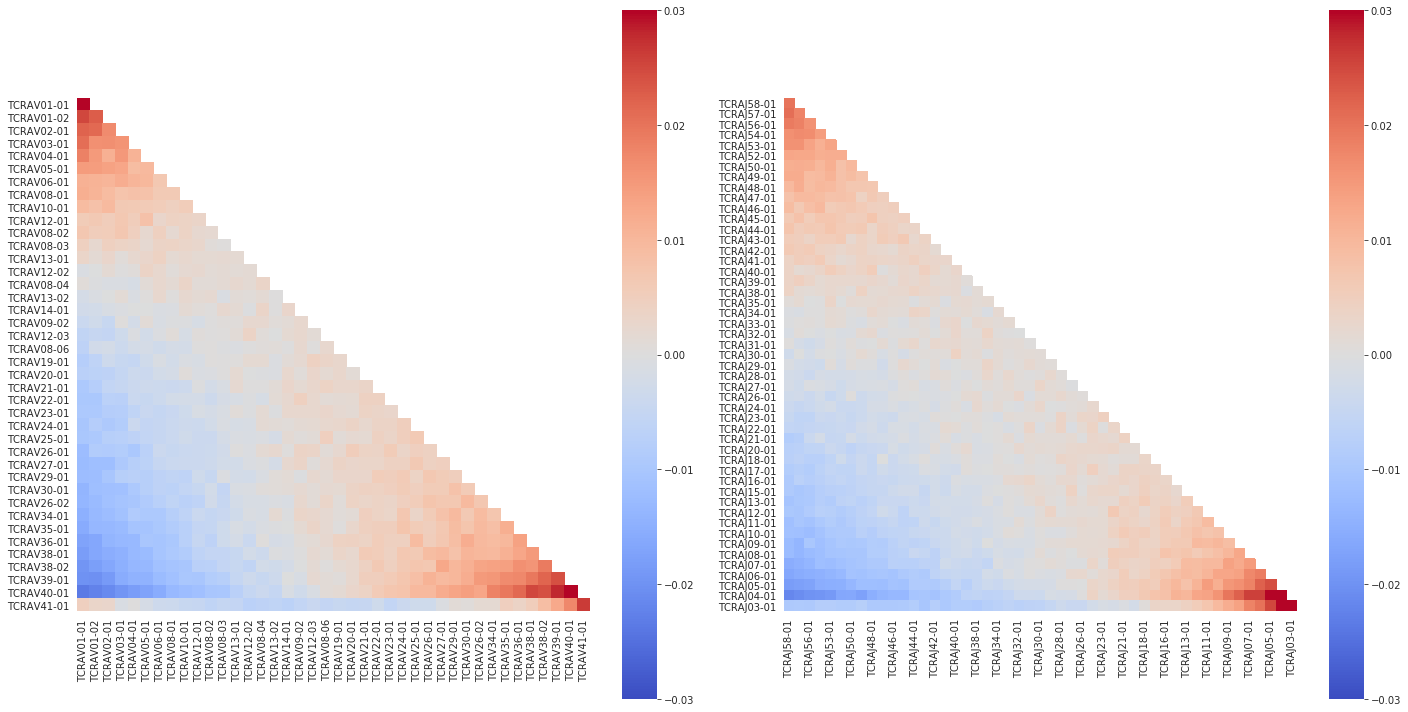

In [10]:
nb_gen = 1000000
Nr = 5
pgeomV = 0.08
pgeomJ = 0.05
Pr = 0.3

pVn1n2, pJn1n2 = experiment(nb_gen, Nr, pgeomV, pgeomJ, Pr)

pVn = np.sum(pVn1n2, axis=0)/np.sum(pVn1n2)
pJn = np.sum(pJn1n2, axis=0)/np.sum(pJn1n2)

covVn1n2 = np.array([[(pVn1n2[n1,n2]-pVn[n1]*pVn[n2])/(
    sqrt(pVn[n1]*pVn[n2]*(1-pVn[n1])*(1-pVn[n2])) + 1e-14)
                    if n1 <= n2 else 0
                     for n1 in range(len(ordered_V_genes))]
                     for n2 in range(len(ordered_V_genes))]
                     )


covJn1n2 = np.array([[(pJn1n2[n1,n2]-pJn[n1]*pJn[n2])/(
    sqrt(pJn[n1]*pJn[n2]*(1-pJn[n1])*(1-pJn[n2])) + 1e-14)
                    if n1 <= n2 else 0
                     for n1 in range(len(ordered_J_genes))]
                     for n2 in range(len(ordered_J_genes))]
                     )

indx = ordered_J_genes
simJ = pd.DataFrame(covJn1n2, index=indx, columns=indx)

indx = ordered_V_genes
simV = pd.DataFrame(covVn1n2, index=indx, columns=indx)

sns.set_style(style='white')
f, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
mask=np.zeros_like(simV)
mask[np.triu_indices_from(mask, k=1)] = True
sns.heatmap(simV, vmin=-0.03, vmax=0.03,
            mask=mask,
            cmap="coolwarm",
            ax=ax1,square=True)

mask=np.zeros_like(simJ)
mask[np.triu_indices_from(mask, k=1)] = True
sns.heatmap(simJ, vmin=-0.03, vmax=0.03,
            mask=mask,
            cmap="coolwarm",
            ax=ax2,square=True)

plt.tight_layout()
plt.savefig("correlation_gen.pdf")
plt.show()

## $\beta$-$\alpha$ correlation

In [11]:
posgenesVA = pd.read_csv("../Datas/genes/position_ordered_TCRA_Vgenes")
ordered_V_genes_A = list(posgenesVA.name.values)
posgenesVB = pd.read_csv("../Datas/genes/position_ordered_TCRB_Vgenes")
ordered_V_genes_B = list(posgenesVB.name.values)

df = pd.read_csv(filepairsab, sep='\t')

ordered_V_genes_A = [u for u in ordered_V_genes_A 
                   if u in df.vname_1.value_counts().keys() 
                   and df.vname_1.value_counts()[u] > 50 
                   and u[0:4] != "TCRD"]
ordered_V_genes_B = [u for u in ordered_V_genes_B 
                   if u in df.vname_2.value_counts().keys() 
                   and df.vname_2.value_counts()[u] > 50 
                   and u[0:4] != "TCRD"]

posgenesJA = pd.read_csv("../Datas/genes/position_ordered_TCRA_Jgenes")
ordered_J_genes_A = list(posgenesJA.name.values)
posgenesJB = pd.read_csv("../Datas/genes/position_ordered_TCRB_Jgenes")
ordered_J_genes_B = list(posgenesJB.name.values)

ordered_J_genes_A = [u for u in ordered_J_genes_A 
                   if u in df.jname_1.value_counts().keys() 
                   and df.jname_1.value_counts()[u] > 50 
                   and u[0:4] != "TCRD"]
ordered_J_genes_B = [u for u in ordered_J_genes_B 
                   if u in df.jname_2.value_counts().keys() 
                   and df.jname_2.value_counts()[u] > 50 
                   and u[0:4] != "TCRD"]


Covabv = {(v1, v2): np.mean((df['vname_1'] == v1) & (df['vname_2'] == v2)) 
     - np.mean((df['vname_1'] == v1))*np.mean((df['vname_2'] == v2))
     for v1 in ordered_V_genes_A for v2 in ordered_V_genes_B}
Sigma1 = {v1: np.std(df['vname_1'] == v1) for v1 in ordered_V_genes_A}
Sigma2 = {v2: np.std(df['vname_2'] == v2) for v2 in ordered_V_genes_B}

nCov = np.zeros((len(ordered_V_genes_A),len(ordered_V_genes_B)))
for k in range(len(ordered_V_genes_A)):
    for l in range(len(ordered_V_genes_B)):
        nCov[k,l] = (Covabv[(ordered_V_genes_A[k],ordered_V_genes_B[l])]
                       /(Sigma1[ordered_V_genes_A[k]]
                             *Sigma2[ordered_V_genes_B[l]]))
uV = pd.DataFrame(nCov, index=ordered_V_genes_A, columns=ordered_V_genes_B)


Covabj = {(j1, j2): np.mean((df['jname_1'] == j1) & (df['jname_2'] == j2)) 
     - np.mean((df['jname_1'] == j1))*np.mean((df['jname_2'] == j2))
     for j1 in ordered_J_genes_A for j2 in ordered_J_genes_B}
Sigma1 = {j1: np.std(df['jname_1'] == j1) for j1 in ordered_J_genes_A}
Sigma2 = {j2: np.std(df['jname_2'] == j2) for j2 in ordered_J_genes_B}

nCov = np.zeros((len(ordered_J_genes_A),len(ordered_J_genes_B)))
for k in range(len(ordered_J_genes_A)):
    for l in range(len(ordered_J_genes_B)):
        nCov[k,l] = (Covabj[(ordered_J_genes_A[k],ordered_J_genes_B[l])]
                       /(Sigma1[ordered_J_genes_A[k]]
                             *Sigma2[ordered_J_genes_B[l]]))
uJ = pd.DataFrame(nCov, index=ordered_J_genes_A, columns=ordered_J_genes_B)

Covabvj = {(v1, j2): np.mean((df['vname_1'] == v1) & (df['jname_2'] == j2)) 
     - np.mean((df['vname_1'] == v1))*np.mean((df['jname_2'] == j2))
     for v1 in ordered_V_genes_A for j2 in ordered_J_genes_B}
Sigma1 = {v1: np.std(df['vname_1'] == v1) for v1 in ordered_V_genes_A}
Sigma2 = {j2: np.std(df['jname_2'] == j2) for j2 in ordered_J_genes_B}

nCov = np.zeros((len(ordered_V_genes_A),len(ordered_J_genes_B)))
for k in range(len(ordered_V_genes_A)):
    for l in range(len(ordered_J_genes_B)):
        nCov[k,l] = (Covabvj[(ordered_V_genes_A[k],ordered_J_genes_B[l])]
                       /(Sigma1[ordered_V_genes_A[k]]
                             *Sigma2[ordered_J_genes_B[l]]))
uVJ = pd.DataFrame(nCov, index=ordered_V_genes_A, columns=ordered_J_genes_B)


Covabjv = {(j1, v2): np.mean((df['jname_1'] == j1) & (df['vname_2'] == v2)) 
     - np.mean((df['jname_1'] == j1))*np.mean((df['vname_2'] == v2))
     for j1 in ordered_J_genes_A for v2 in ordered_V_genes_B}
Sigma1 = {j1: np.std(df['jname_1'] == j1) for j1 in ordered_J_genes_A}
Sigma2 = {v2: np.std(df['vname_2'] == v2) for v2 in ordered_V_genes_B}

nCov = np.zeros((len(ordered_J_genes_A),len(ordered_V_genes_B)))
for k in range(len(ordered_J_genes_A)):
    for l in range(len(ordered_V_genes_B)):
        nCov[k,l] = (Covabjv[(ordered_J_genes_A[k],ordered_V_genes_B[l])]
                       /(Sigma1[ordered_J_genes_A[k]]
                             *Sigma2[ordered_V_genes_B[l]]))
uJV = pd.DataFrame(nCov, index=ordered_J_genes_A, columns=ordered_V_genes_B)


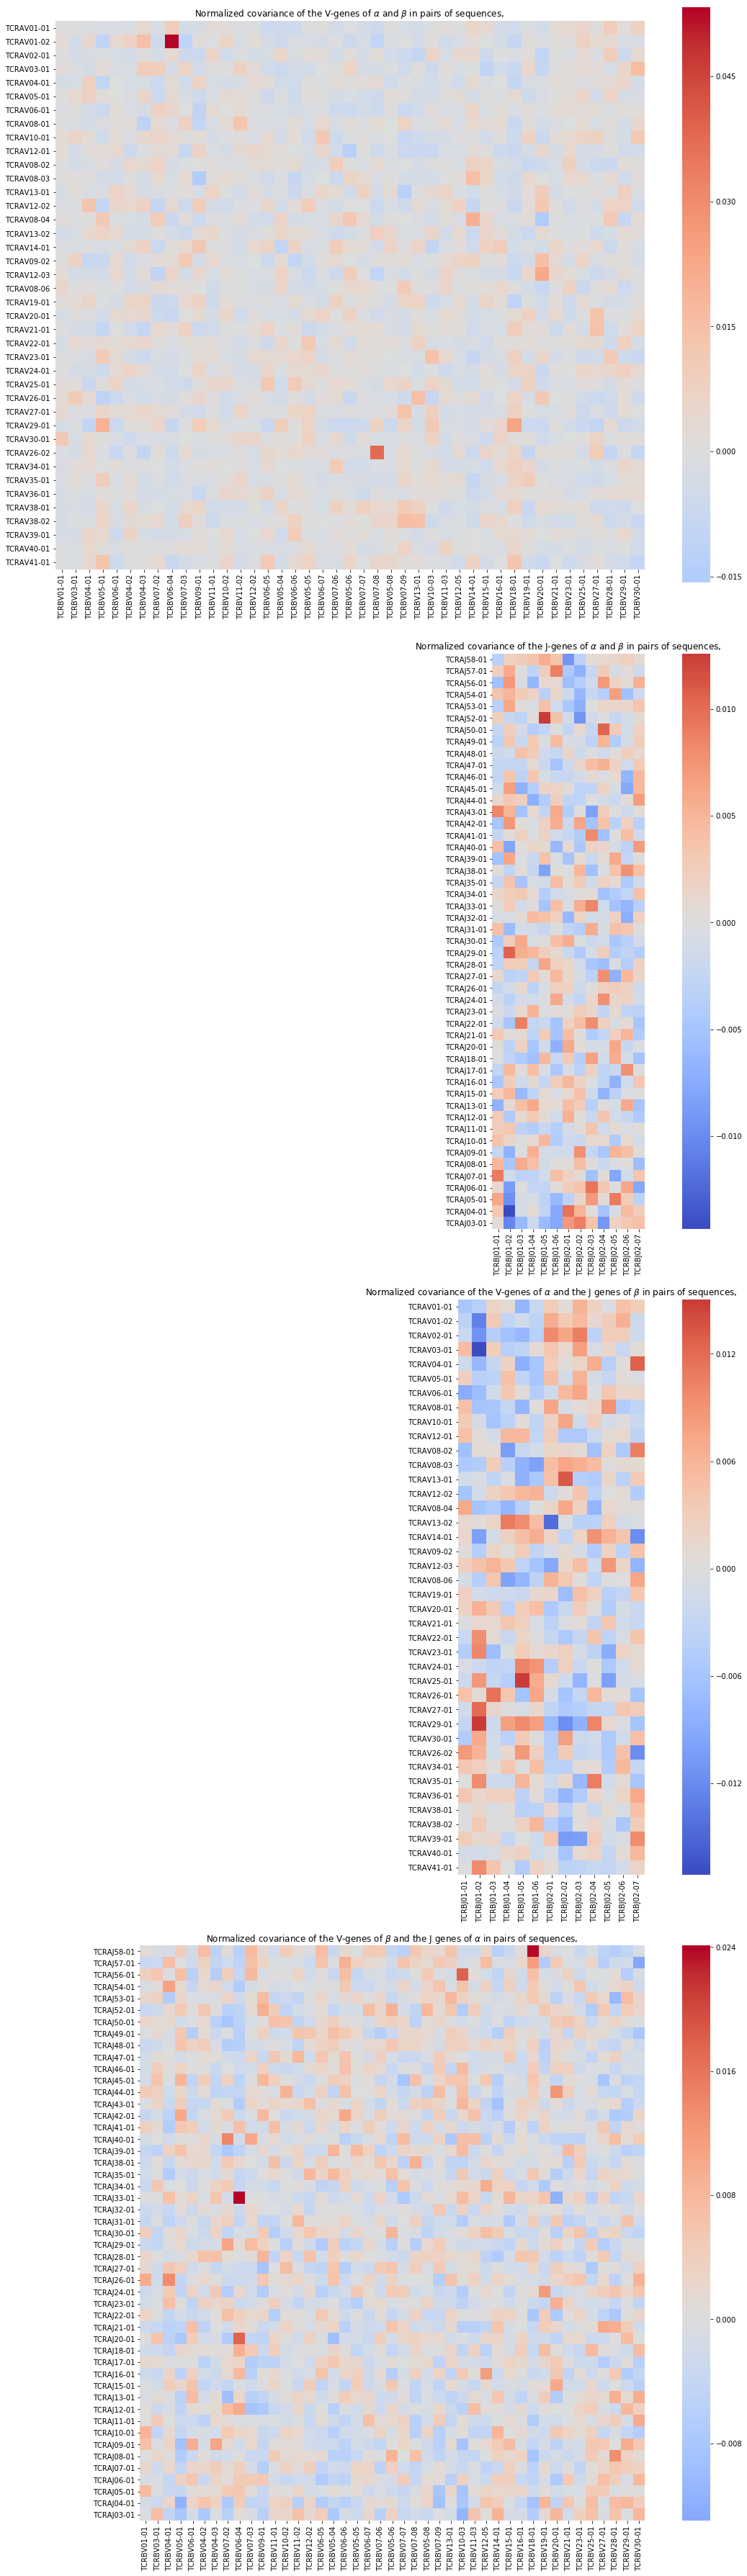

In [21]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(15, 50))

sns.heatmap(uV, cmap="coolwarm", center=0., square=True, ax=ax1)
ax1.set_title(r"Normalized covariance of the V-genes of $\alpha$ and $\beta$ in pairs of sequences, ")

sns.heatmap(uJ, cmap="coolwarm",square=True, center=0., ax=ax2)
ax2.set_title(r"Normalized covariance of the J-genes of $\alpha$ and $\beta$ in pairs of sequences, ")


sns.heatmap(uVJ, cmap="coolwarm",square=True, center=0., ax=ax3)
ax3.set_title(r"Normalized covariance of the V-genes of $\alpha$ and the J genes of $\beta$ in pairs of sequences, ")


sns.heatmap(uJV, cmap="coolwarm",square=True, center=0., ax=ax4)
ax4.set_title(r"Normalized covariance of the V-genes of $\beta$ and the J genes of $\alpha$ in pairs of sequences, ")

plt.tight_layout()
plt.savefig("correlation_VJ_alpha_beta.pdf")
plt.show()

### V and J usage as a function of position on the germline.

In [4]:
dfa = pd.read_csv(filea, sep="\t")

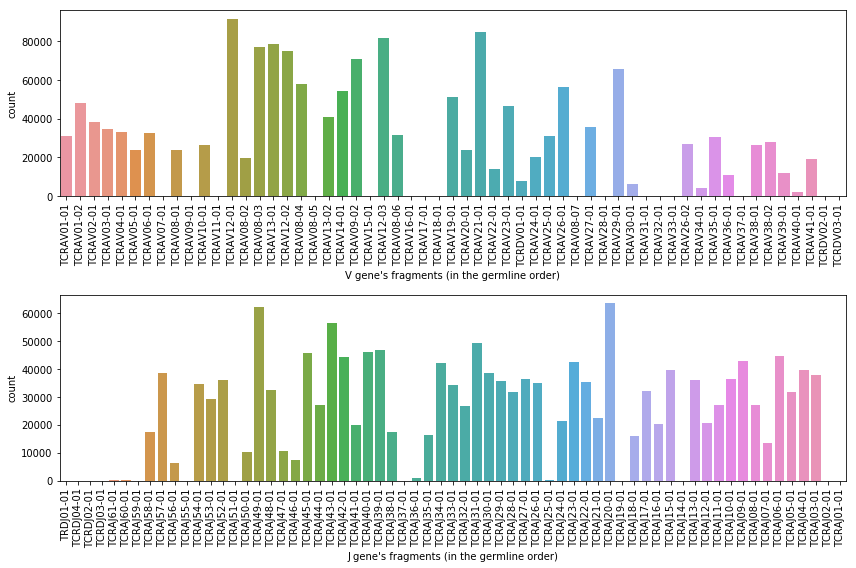

In [13]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
posgenesA = pd.read_csv("../Datas/genes/position_ordered_TCRA_Vgenes")
ordered_V_genes = list(posgenesA.name.values)
sns.countplot(dfa.vname, order=ordered_V_genes, ax=ax1)
posgenesA = pd.read_csv("../Datas/genes/position_ordered_TCRA_Jgenes")
ordered_J_genes = list(posgenesA.name.values)
sns.countplot(dfa.jname, order=ordered_J_genes, ax=ax2)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax1.set_xlabel("V gene's fragments (in the germline order)")
ax2.set_xlabel("J gene's fragments (in the germline order)")
plt.tight_layout()
plt.savefig("VJ_gene_fragments_distribution.pdf")
plt.show()